<a href="https://colab.research.google.com/github/DIVASRAJAN/project11_House_price/blob/main/org_prjct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **REAL ESTATE HOUSE PRICE PREDICTION**

**Objective**


*   Predict the price of houses from the given dataset by applying different regression based machine learning algorithms.
*   Applying different performance boosting methods like feature selection, Hyper parameter tuning etc.


*   Utilizing different EDA tools for visualization and data manipulation
*   Comparing the performance of the different regression models

**About the Dataset**


1.   title

> Shows the number of bedrooms if it is house. and the details of the location



2.   price

> price of the house or the plot

3.   size

> size of the house in square feet


4.   price_per_sqft

> per square feet price for the house or plot

5.   status

> whether the place is open for living or under construction























In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df=pd.read_excel('/content/raw_data.xlsx')
df.head()


,Unnamed: 0,title,price,size,price_per_sqft,status
0,0,3 BHK Apartment in CasaGrand Casagrand Meridian,1.18 Cr,2037,"5,793 / sq ft",Under Construction
1,1,2 BHK Apartment in Shree Nandana Elite,57.56 L,1240,"4,642 / sq ft",Under Construction
2,2,Residential Plot in Saroj Whispering Winds,32.3 L,2000,"1,615 / sq ft",New
3,3,3 BHK Apartment in Navami Landmaark,1.33 Cr,1641,"8,133 / sq ft",Under Construction
4,4,2 BHK Apartment in V Venture EVA,55.32 L,957,"5,787 / sq ft",Ready to move


In [ ]:
df.sample(5)

,Unnamed: 0,title,price,size,price_per_sqft,status
56235,56234,\n Salarpuria Gold Summit\n3 BHK Flat\nHennur\n,165 Cr,1933 Sq.Ft.,NaN,NaN
41597,41597,2 BHK Apartment in Abhee nandana,61.9 L,1140,"5,430 / sq ft",Ready to move
7161,7161,2 BHK Apartment in G Corp The Icon,1.2 Cr,1305,"9,195 / sq ft",Ready to move
27980,27980,1 BHK Independent House,46.52 L,1200,"3,876 / sq ft",Under Construction
1436,1436,Residential Plot,65 L,1200,"5,416 / sq ft",Resale


In [ ]:
df.dtypes

Unnamed: 0         int64
title             object
price             object
size              object
price_per_sqft    object
status            object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74208 entries, 0 to 74207
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      74208 non-null  int64 
 1   title           74208 non-null  object
 2   price           74208 non-null  object
 3   size            73612 non-null  object
 4   price_per_sqft  58445 non-null  object
 5   status          45372 non-null  object
dtypes: int64(1), object(5)
memory usage: 3.4+ MB


In [ ]:
df.shape

(74208, 6)

In [ ]:
df.drop_duplicates()

,Unnamed: 0,title,price,size,price_per_sqft,status
0,0,3 BHK Apartment in CasaGrand Casagrand Meridian,1.18 Cr,2037,"5,793 / sq ft",Under Construction
1,1,2 BHK Apartment in Shree Nandana Elite,57.56 L,1240,"4,642 / sq ft",Under Construction
2,2,Residential Plot in Saroj Whispering Winds,32.3 L,2000,"1,615 / sq ft",New
3,3,3 BHK Apartment in Navami Landmaark,1.33 Cr,1641,"8,133 / sq ft",Under Construction
4,4,2 BHK Apartment in V Venture EVA,55.32 L,957,"5,787 / sq ft",Ready to move
...,...,...,...,...,...,...
74203,74202,5 Bedroom Built-up Area in Whitefield,23100000,3453,6689.834926,NaN
74204,74203,4 BHK Super built-up Area in Richards Town,40000000,3600,11111.111111,NaN
74205,74204,2 BHK Built-up Area in Raja Rajeshwari Nagar,6000000,1141,5258.545136,NaN
74206,74205,4 BHK Super built-up Area in Padmanabhanagar,48800000,4689,10407.336319,NaN


# Forming a new column and adding the number bedroom into it from the 'title' column

In [ ]:

df['space']=df['title'].str.split().str[:2].str.join(' ')
df.head()

,Unnamed: 0,title,price,size,price_per_sqft,status,space
0,0,3 BHK Apartment in CasaGrand Casagrand Meridian,1.18 Cr,2037,"5,793 / sq ft",Under Construction,3 BHK
1,1,2 BHK Apartment in Shree Nandana Elite,57.56 L,1240,"4,642 / sq ft",Under Construction,2 BHK
2,2,Residential Plot in Saroj Whispering Winds,32.3 L,2000,"1,615 / sq ft",New,Residential Plot
3,3,3 BHK Apartment in Navami Landmaark,1.33 Cr,1641,"8,133 / sq ft",Under Construction,3 BHK
4,4,2 BHK Apartment in V Venture EVA,55.32 L,957,"5,787 / sq ft",Ready to move,2 BHK


# Drop unnecessary columns

In [ ]:
df.drop(['Unnamed: 0','title','status'],inplace=True,axis=1)

# Removing irrelevent characters and units from the features

In [ ]:
df['price_per_sqft']=df['price_per_sqft'].str.replace('/ sq ft','')
df['price_per_sqft']=df['price_per_sqft'].str.replace(',','')       #5,751
df['price_per_sqft']=df['price_per_sqft'].str.replace('per sqft','')
df['price_per_sqft']=df['price_per_sqft'].str.replace('₹','')
df['size']=df['size'].str.replace('sqft','')
df['size']=df['size'].str.replace('sqm','')
df.head()

,price,size,price_per_sqft,space
0,1.18 Cr,2037,5793,3 BHK
1,57.56 L,1240,4642,2 BHK
2,32.3 L,2000,1615,Residential Plot
3,1.33 Cr,1641,8133,3 BHK
4,55.32 L,957,5787,2 BHK


In [ ]:
df['space'].value_counts()

2 BHK                 18655
3 BHK                 18547
Residential Plot      11355
4 BHK                  4055
1 BHK                  1944
                      ...  
Ganapathipura Plot        1
Bilekahalli 6+            1
Seegehalli 3              1
Nelamangala 2             1
18 Bedroom                1
Name: space, Length: 2059, dtype: int64

# Replacing values in space column other than 'BHK' and 'Bedroom' into 'plot'

In [ ]:
df['space']=df['space'].map(lambda x: x if 'BHK' in x or 'Bedroom' in x else 'plot'  )
df.head()

# def take(sp):
#   if 'BHK' in sp:
#     pass
#   elif 'Bedroom' in sp:
#     pass
#   else:
#     sp='plot'
#   return sp

# df['space']=df['space'].apply(take)

,price,size,price_per_sqft,space
0,1.18 Cr,2037,5793,3 BHK
1,57.56 L,1240,4642,2 BHK
2,32.3 L,2000,1615,plot
3,1.33 Cr,1641,8133,3 BHK
4,55.32 L,957,5787,2 BHK


In [ ]:
df['space'].value_counts()

plot          27101
2 BHK         18655
3 BHK         18547
4 BHK          4055
1 BHK          1944
4 Bedroom       813
5 BHK           662
3 Bedroom       547
2 Bedroom       329
5 Bedroom       297
6 BHK           246
6 Bedroom       191
7 BHK           154
10 BHK          145
1 Bedroom       105
8 BHK            99
8 Bedroom        84
7 Bedroom        83
9 BHK            60
9 Bedroom        46
10 Bedroom       12
11 BHK            7
12 BHK            7
15 BHK            6
13 BHK            4
11 Bedroom        2
27 BHK            1
19 BHK            1
16 BHK            1
43 Bedroom        1
14 BHK            1
12 Bedroom        1
18 Bedroom        1
Name: space, dtype: int64

# Removing rows having plot value in space column

In [ ]:
df.drop(df[df['space'] == 'plot'].index, inplace=True)
df.reset_index(drop=True,inplace=True)
df.head()

,price,size,price_per_sqft,space
0,1.18 Cr,2037,5793,3 BHK
1,57.56 L,1240,4642,2 BHK
2,1.33 Cr,1641,8133,3 BHK
3,55.32 L,957,5787,2 BHK
4,83.47 L,1575,5300,3 BHK


# Removing 'BHK' and 'Bedroom' from the space column

In [ ]:
df['space']=df['space'].str.replace('Bedroom','')
df['space']=df['space'].str.replace('BHK','')
df.head()

,price,size,price_per_sqft,space
0,1.18 Cr,2037,5793,3
1,57.56 L,1240,4642,2
2,1.33 Cr,1641,8133,3
3,55.32 L,957,5787,2
4,83.47 L,1575,5300,3


In [ ]:
df.shape

(47107, 4)

In [ ]:
df['space'].value_counts()

3      19094
2      18984
4       4868
1       2049
5        959
6        437
7        237
8        183
10       157
9        106
11         9
12         8
15         6
13         4
27         1
19         1
16         1
43         1
14         1
18         1
Name: space, dtype: int64

In [ ]:
df.isna().sum()

price                 0
size              13677
price_per_sqft    13205
space                 0
dtype: int64

In [ ]:
df.dropna(subset=['price_per_sqft'],inplace=True)

In [ ]:
df.isna().sum()

price               0
size              546
price_per_sqft      0
space               0
dtype: int64

In [ ]:
df.dtypes

price             object
size              object
price_per_sqft    object
space             object
dtype: object

# string replace

In [ ]:
df['price']=df['price'].str.replace('₹','')

# Converting price into numbers

In [ ]:
def convert_prize(cash):
  if 'Cr' in cash:
    return float(cash.replace(' Cr',''))*10000000
  elif 'Lac' in cash:
    return float(cash.replace(' Lac',''))*100000
  elif 'L' in cash:
    return float(cash.replace(' L',''))*100000
  else:
    return float(cash)

In [ ]:
df['price']=df['price'].apply(convert_prize)

In [ ]:
df['price'].unique()

array([11800000.        ,  5756000.        , 13300000.        , ...,
       64400000.00000001,  9710000.        ,  9160000.        ])

# Datatype changing

In [ ]:
df['size']=df['size'].astype(float)
df['price_per_sqft']=df['price_per_sqft'].astype(float)
df['space']=df['space'].astype(int)
df['price']=df['price'].astype(int)

In [ ]:
df.isna().sum()

price               0
size              546
price_per_sqft      0
space               0
dtype: int64

In [ ]:
df.shape

(33902, 4)

# Dealing missing values

<Axes: xlabel='size', ylabel='Density'>

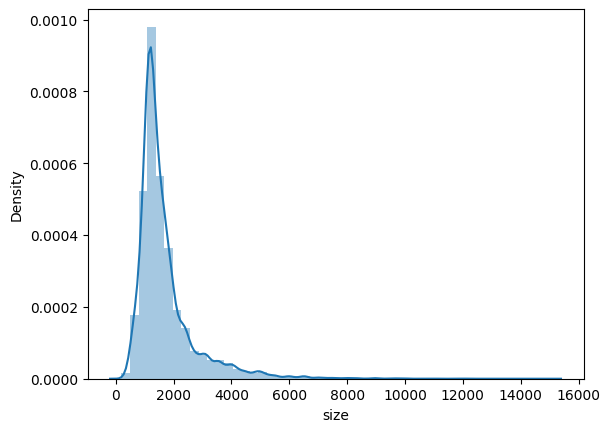

In [ ]:
sns.distplot(df['size'])

In [ ]:
# distribution is not normal so median is used to fill the missing value
df['size']=df['size'].fillna(df['size'].median())

In [ ]:
df.isna().sum()

price             0
size              0
price_per_sqft    0
space             0
dtype: int64

In [ ]:
df.dtypes

price               int64
size              float64
price_per_sqft    float64
space               int64
dtype: object

In [ ]:
df.head()

,price,size,price_per_sqft,space
0,11800000,2037.0,5793.0,3
1,5756000,1240.0,4642.0,2
2,13300000,1641.0,8133.0,3
3,5532000,957.0,5787.0,2
4,8347000,1575.0,5300.0,3


# **Graphical representation of the Data**

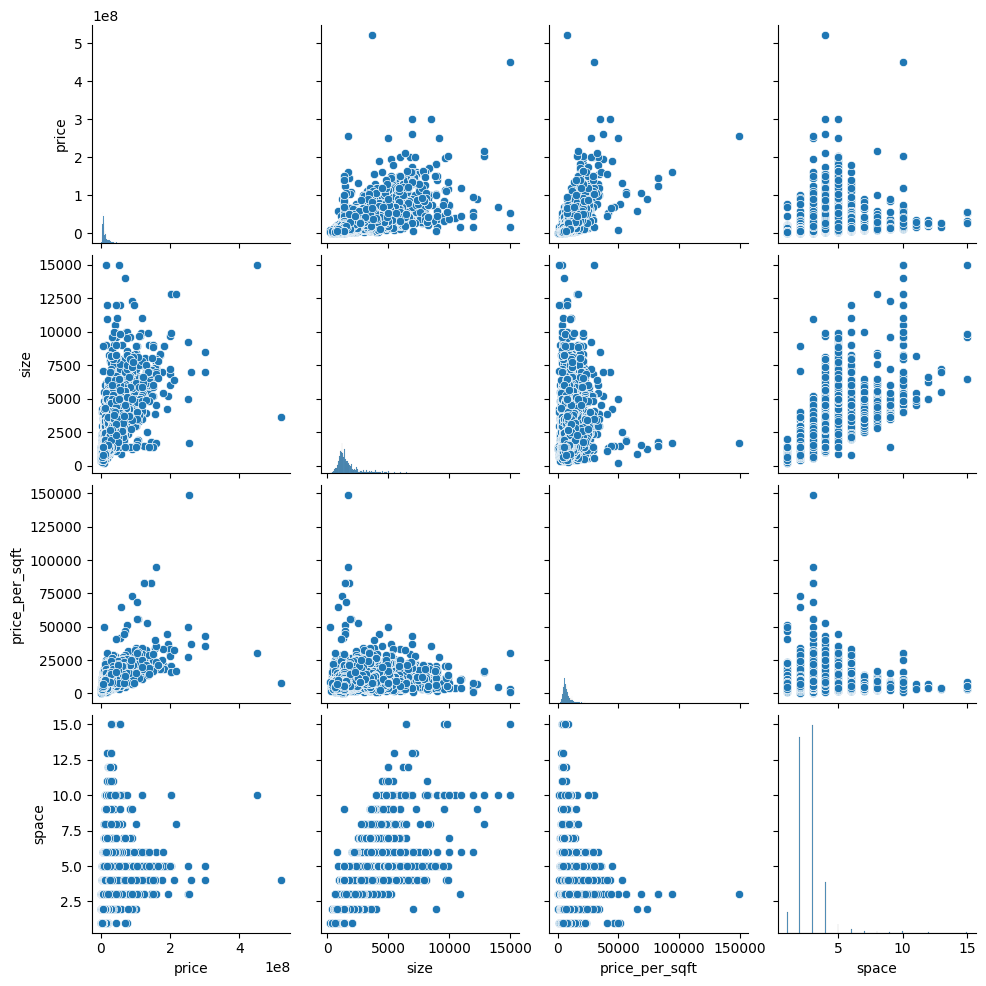

In [ ]:
sns.pairplot(df)

<Axes: >

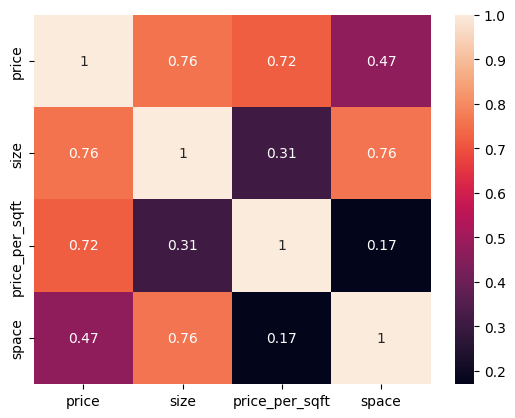

In [ ]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='space', ylabel='count'>

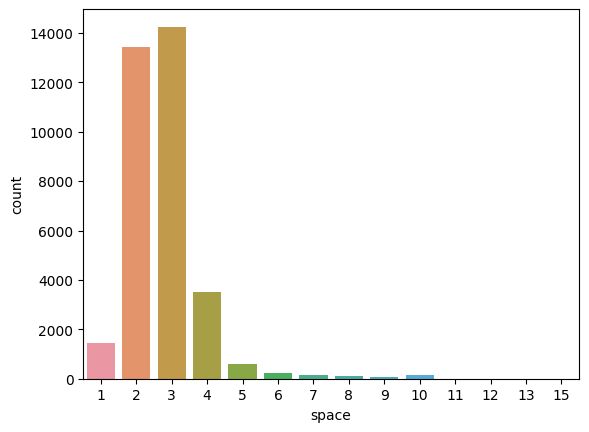

In [ ]:











sns.countplot(x='space',data=df)



Axes(0.125,0.11;0.775x0.77)


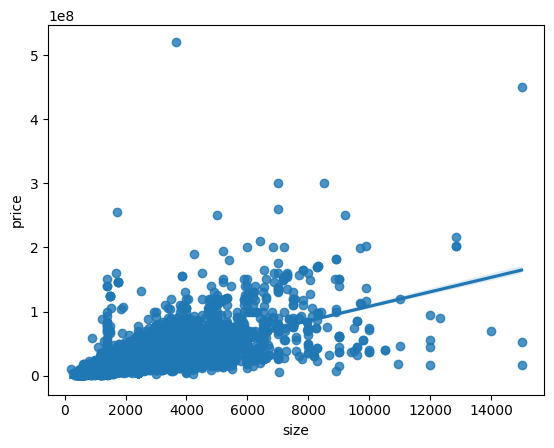

Axes(0.125,0.11;0.775x0.77)


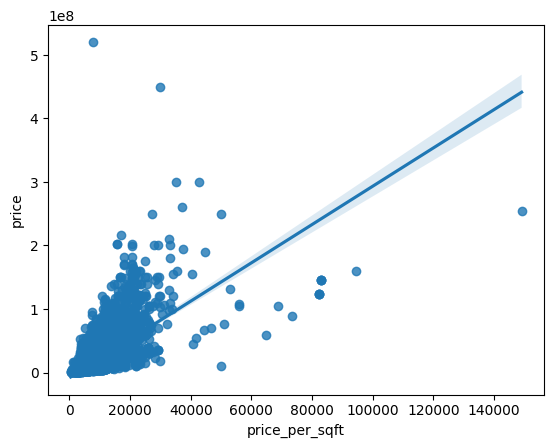

Axes(0.125,0.11;0.775x0.77)


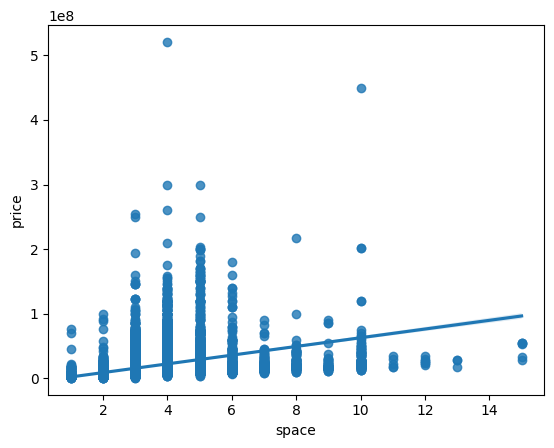

In [ ]:

















































x_axis=['size', 'price_per_sqft', 'space']
y_axis=df['price']

for i in x_axis:
 print(sns.regplot(x=df[i],y=y_axis))
 plt.show()

<Axes: >

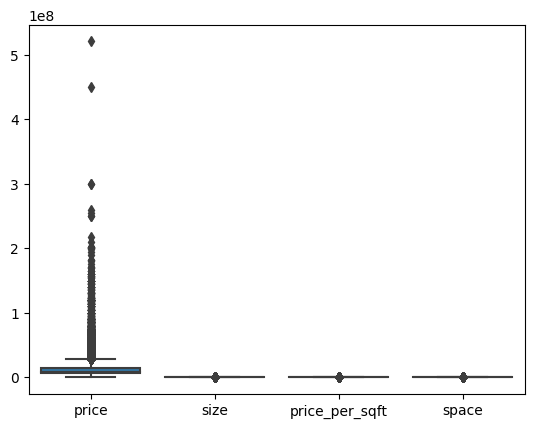

In [ ]:






sns.boxplot(df)

**there is outliers in price column **


<Axes: >

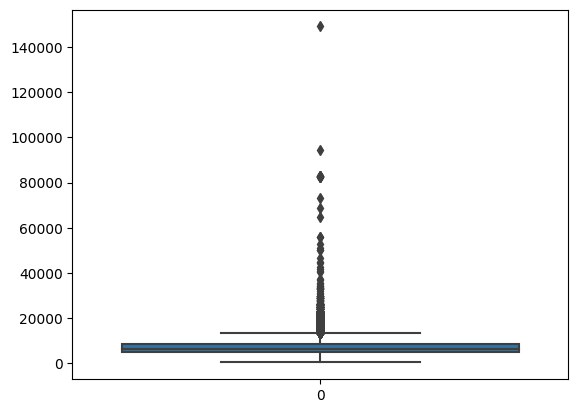

In [ ]:
sns.boxplot(df['price_per_sqft'])

<Axes: >

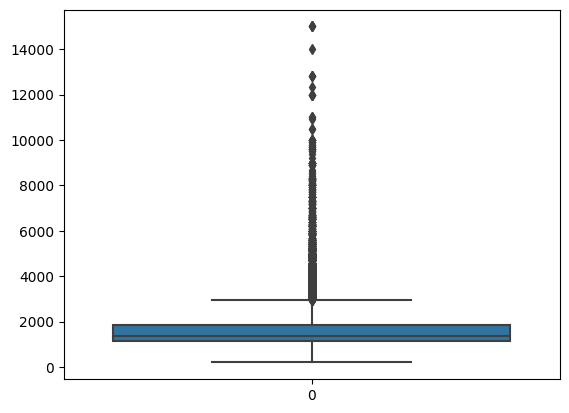

In [ ]:
sns.boxplot(df['size'])

<Axes: >

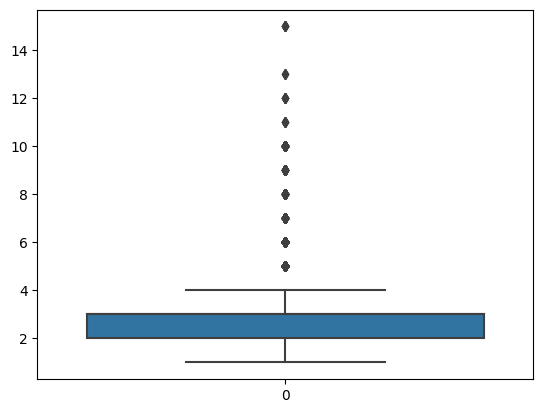

In [ ]:
sns.boxplot(df['space'])

<Axes: >

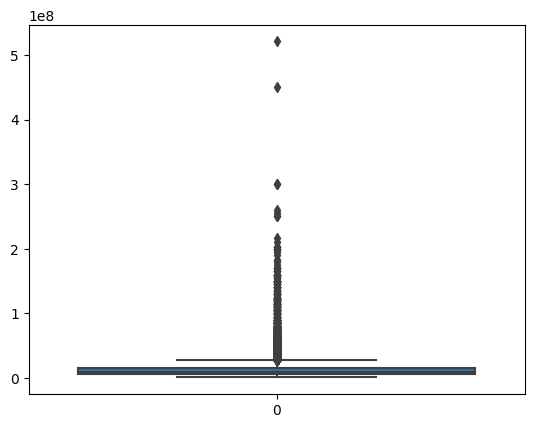

In [ ]:
# before removing outliers

sns.boxplot(df['price'])

# dealing outliers with mean **iqr - method**

In [ ]:
# interquartile range
ds=['size', 'price_per_sqft','price']
for i in ds:
  q1=df[i].quantile(0.25)
  q3=df[i].quantile(0.75)
  iqr=q3-q1
  lower=q1-(iqr*1.5)
  upper=q3+(iqr*1.5)

  df[i] = df[i].apply(lambda x: x if lower <= x <= upper else df[i].mean())



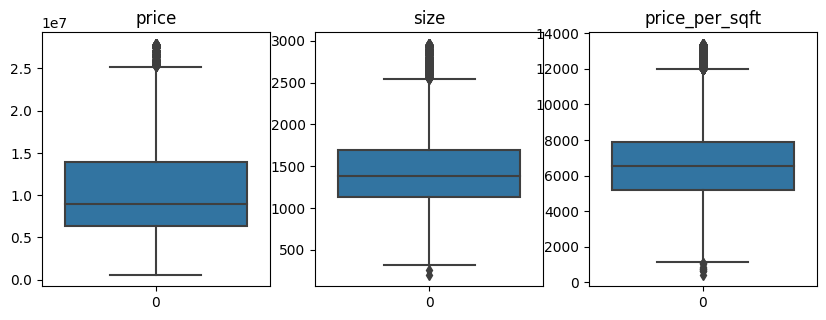

In [ ]:
# after dealing outliers
plt.figure(figsize=(10,3.3))

plt.subplot(1,3,1)
sns.boxplot(df['price'])
plt.title('price')

plt.subplot(1,3,2)
sns.boxplot(df['size'])
plt.title('size')

plt.subplot(1,3,3)
sns.boxplot(df['price_per_sqft'])
plt.title('price_per_sqft')
plt.show()

In [ ]:
df.dtypes

price             float64
size              float64
price_per_sqft    float64
space               int64
dtype: object

In [ ]:
x=df.drop(['price'],axis=1).astype(int)
y=df['price'].astype(int)

# Feature selection using **chi_square test**

In [ ]:

# from sklearn.feature_selection import SelectKBest,chi2

# chi=SelectKBest(chi2,k=3)
# best=chi.fit_transform(x,y)
#print(best.shape)
# x_indes=chi.get_support(indices=True)
# print(df.columns[x_indes])

# x_chi=df.drop(['space','price'],axis=1)
# x_chi.dtypes


In [ ]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts=train_test_split(x,y,random_state=42,test_size=0.30)


In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
std.fit(xtr)
xtr=std.transform(xtr)
xts=std.transform(xts)

# **Model creation**

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

# Hyperparmeter tuning for linear Regression

In [ ]:
# to get the default values for the parameters
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [ ]:

from sklearn.model_selection import GridSearchCV

parameter={'copy_X': [True,False], 'fit_intercept': [True,False], 'n_jobs': [None,1,5,7,6], 'positive':[True, False]}
gsv=GridSearchCV(model,parameter,cv=10,scoring='accuracy')
gsv.fit(xtr,ytr)


GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [None, 1, 5, 7, 6],
                         'positive': [True, False]},
             scoring='accuracy')

In [ ]:
gsv.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': True}

# Multiple linear regression model creation

In [ ]:

from sklearn.linear_model import LinearRegression
model1=LinearRegression(positive=True)
model1.fit(xtr,ytr)
ypr=model1.predict(xts)


In [ ]:
df1=pd.DataFrame({'actual':yts,'predicted':ypr,'differance':yts-ypr})
df1

,actual,predicted,differance
18397,13895895,1.369176e+07,2.041323e+05
24636,13895895,2.244445e+07,-8.548554e+06
5749,13895895,1.557182e+07,-1.675923e+06
21115,13895895,2.003561e+07,-6.139714e+06
1402,6400000,6.553946e+06,-1.539456e+05
...,...,...,...
19495,12500000,1.329248e+07,-7.924791e+05
25818,16500000,1.560057e+07,8.994319e+05
10202,2610000,1.686807e+06,9.231928e+05
2984,11500000,1.274146e+07,-1.241461e+06


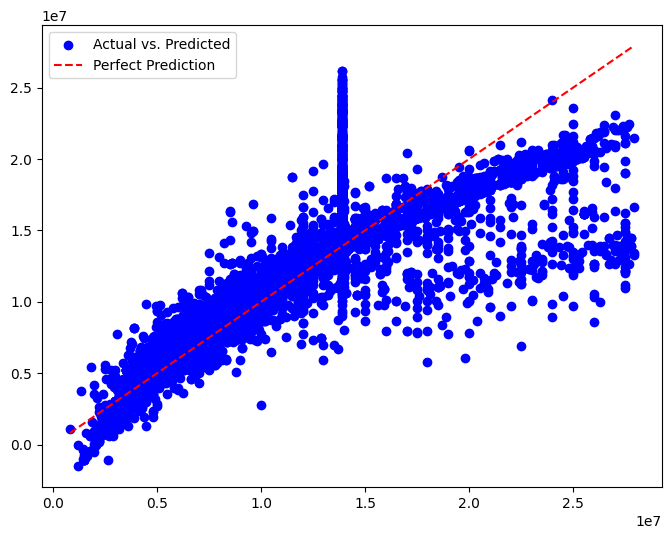

In [ ]:

















plt.figure(figsize=(8, 6))
plt.scatter(df1['actual'], df1['predicted'], marker='o', color='blue', label='Actual vs. Predicted')
plt.plot([min(df1['actual']), max(df1['actual'])], [min(df1['actual']), max(df1['actual'])], linestyle='--', color='red', label='Perfect Prediction')
plt.legend()


In [ ]:
print('slope is ')
print(list(zip(x,model1.coef_)))
print('constant is ',model1.intercept_)

slope is 
[('size', 2381157.806194569), ('price_per_sqft', 2703215.8259997703), ('space', 1207912.0173615823)]
constant is  10436601.962454174


In [ ]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_squared_error

r0=r2_score(yts,ypr)
print('r2 score',r2_score(yts,ypr))
print('maep ',mean_absolute_percentage_error(ypr,yts))

r2 score 0.7565905904339756
maep  0.16570523266452494


# Polynomial Regression

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
poly.fit(x,y)
xply=poly.fit_transform(x)

xtrp,xtsp,ytrp,ytsp=train_test_split(xply,y,random_state=42,test_size=0.30)

model2=LinearRegression()
model2.fit(xtrp,ytrp)
yp=model2.predict(xtsp)



In [ ]:
xply.shape

(33902, 20)

In [ ]:
r1=r2_score(ytsp,yp)
print('r2 score',r1)
print('maep ',mean_absolute_percentage_error(yp,ytsp))





r2 score 0.8134061502988745
maep  0.11769392929248679


# Decision tree algorithm

In [ ]:

from sklearn.tree import DecisionTreeRegressor
dec=DecisionTreeRegressor()
dec.fit(xtr,ytr)
ypr1=dec.predict(xts)

r2=r2_score(yts,ypr1)
print('r2 score',r2)
print('maep ',mean_absolute_percentage_error(ypr1,yts))

r2 score 0.9223807263497109
maep  0.03143447676581806


# Random forest algorithm

In [ ]:

from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
random.fit(xtr,ytr)
ypr2=random.predict(xts)

r3=r2_score(yts,ypr2)
print('r2 score',r3)
print('maep ',mean_absolute_percentage_error(ypr2,yts))

r2 score 0.9412874225012221
maep  0.03316465026566907


# Ridge Regression

In [ ]:

from sklearn.linear_model import Ridge
rdg=Ridge(alpha=2)
rdg.fit(xtr,ytr)
yr=rdg.predict(xts)

r4=r2_score(yts,yr)
print('r2 score',r4)
print('maep ',mean_absolute_percentage_error(yr,yts))

r2 score 0.75659235954779
maep  0.16659618732812337


Text(0.5, 1.0, 'accuracy with different models')

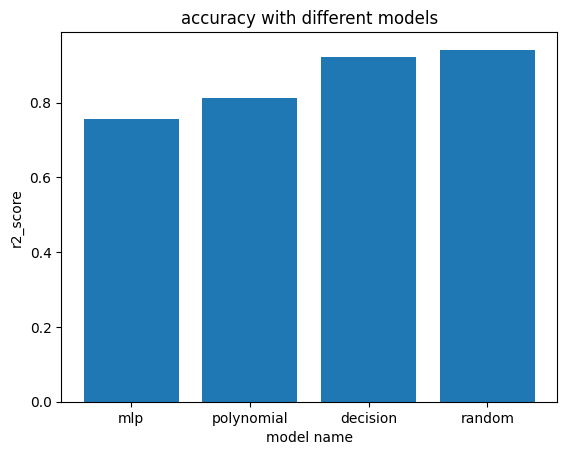

In [ ]:

al=['mlp','polynomial','decision','random']
result=[r0,r1,r2,r3]

plt.bar(al,result)
plt.xlabel('model name')
plt.ylabel('r2_score')
plt.title('accuracy with different models')























# **Pickling**

In [ ]:


import pickle

with open('random_forest.pickle', 'wb') as dump_var:
    pickle.dump(random, dump_var)

pickle_in = open('random_forest.pickle', 'rb')
pickle_clf = pickle.load(pickle_in)

accuracy_pkl = pickle_clf.score(xts,yts)
accuracy_pkl



0.9412874225012221